<a href="https://colab.research.google.com/github/francianerod/Doutorado-ESAN-UFMS/blob/main/C%C3%93DIGO_TESE_PARTE_3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Abertura de biblioteca e dados**

In [1]:
# Importação da biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Abertura dos dados
df = pd.read_csv('/content/cpao_oficial_dados_1979_2023.csv', sep=';')

In [4]:
# Mudança do tipo de dados da data
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

In [5]:
# Eliminando linhas vazias referentes a 2024.
df = df.dropna()

## **Médias climatológicas de Dourados**

In [6]:
# Período 1: 01/01/1980 a 31/12/2009
periodo_1 = df[(df['data'] >= '1980-01-01') & (df['data'] <= '2009-12-31')]

# Período 2: 01/01/1994 a 31/10/2023
periodo_2 = df[(df['data'] >= '1994-01-01') & (df['data'] <= '2023-10-31')]

In [7]:
# Médias mensais para o período 1
medias_mensais_periodo_1 = periodo_1.groupby(periodo_1['data'].dt.month)[['Tmedia', 'Tmax', 'Tmin']].mean()

# Médias mensais para o período 2
medias_mensais_periodo_2 = periodo_2.groupby(periodo_2['data'].dt.month)[['Tmedia', 'Tmax', 'Tmin']].mean()

In [8]:
# Organização dos dados
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
medias_mensais_periodo_1.index = meses
medias_mensais_periodo_2.index = meses

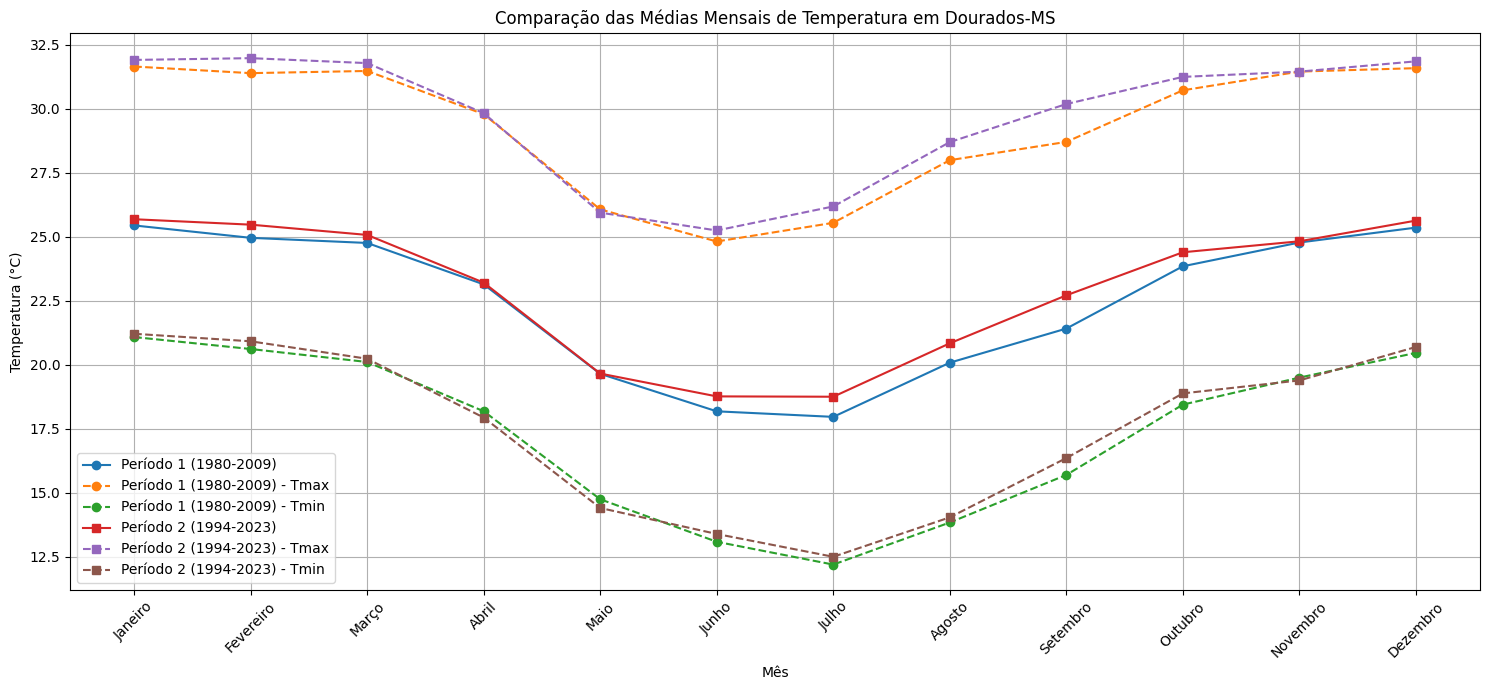

In [9]:
# Configurando gráficos
# Configurando o tamanho da figura
plt.figure(figsize=(15, 7))

# Plotando os dados do período 1
plt.plot(medias_mensais_periodo_1.index, medias_mensais_periodo_1['Tmedia'], label='Período 1 (1980-2009)', marker='o')
plt.plot(medias_mensais_periodo_1.index, medias_mensais_periodo_1['Tmax'], label='Período 1 (1980-2009) - Tmax', marker='o', linestyle='--')
plt.plot(medias_mensais_periodo_1.index, medias_mensais_periodo_1['Tmin'], label='Período 1 (1980-2009) - Tmin', marker='o', linestyle='--')

# Plotando os dados do período 2
plt.plot(medias_mensais_periodo_2.index, medias_mensais_periodo_2['Tmedia'], label='Período 2 (1994-2023)', marker='s')
plt.plot(medias_mensais_periodo_2.index, medias_mensais_periodo_2['Tmax'], label='Período 2 (1994-2023) - Tmax', marker='s', linestyle='--')
plt.plot(medias_mensais_periodo_2.index, medias_mensais_periodo_2['Tmin'], label='Período 2 (1994-2023) - Tmin', marker='s', linestyle='--')

# Adicionando título, rótulos dos eixos e legenda
plt.title('Comparação das Médias Mensais de Temperatura em Dourados-MS')
plt.xlabel('Mês')
plt.ylabel('Temperatura (°C)')
plt.legend() #loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5
plt.grid(True)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout() # ajusta o layout para evitar sobreposição de elementos
plt.show()

In [10]:
# Agrupa os dados por ano e mês e soma a chuva
chuva_acumulada_periodo_1 = periodo_1.groupby([periodo_1['data'].dt.year, periodo_1['data'].dt.month])['chuva'].sum()
chuva_acumulada_periodo_2 = periodo_2.groupby([periodo_2['data'].dt.year, periodo_2['data'].dt.month])['chuva'].sum()


# Calcula a média mensal do acumulado de chuva para cada período
media_chuva_mensal_periodo_1 = chuva_acumulada_periodo_1.groupby(level=1).mean()
media_chuva_mensal_periodo_2 = chuva_acumulada_periodo_2.groupby(level=1).mean()

# Define os nomes dos meses para o índice
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
media_chuva_mensal_periodo_1.index = meses
media_chuva_mensal_periodo_2.index = meses

<Figure size 1500x700 with 0 Axes>

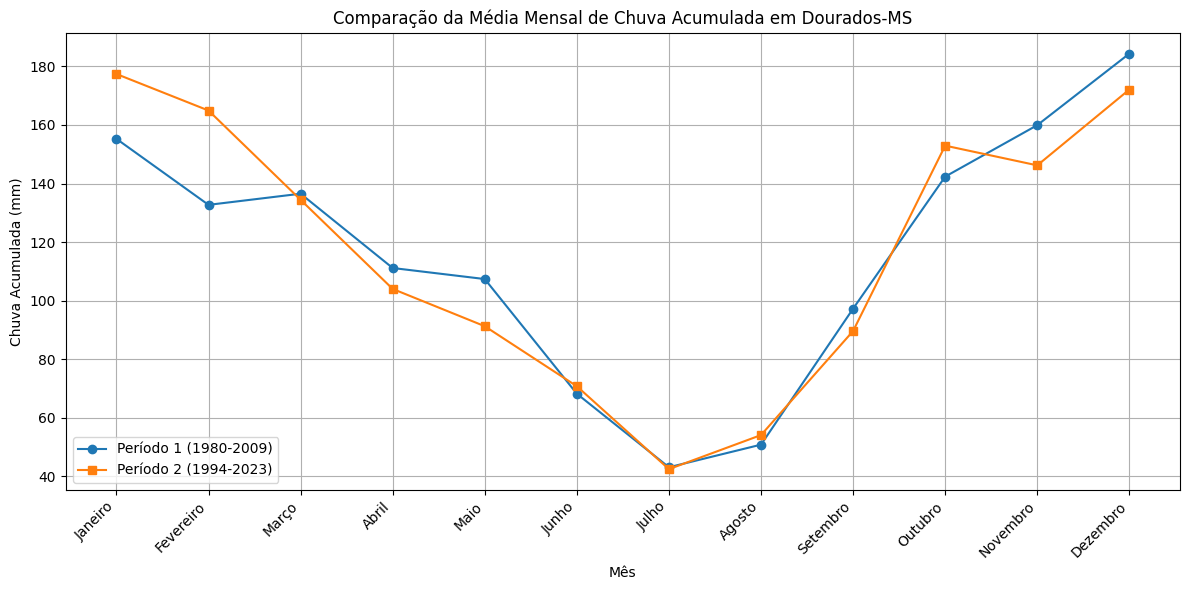

In [11]:
# Configurando o tamanho da figura
plt.figure(figsize=(15, 7))

# Dados para o gráfico
meses = media_chuva_mensal_periodo_1.index  # Usando os meses do período 1 como eixo x
chuva_periodo_1 = media_chuva_mensal_periodo_1.values
chuva_periodo_2 = media_chuva_mensal_periodo_2.values

# Criando o gráfico
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
plt.plot(meses, chuva_periodo_1, label='Período 1 (1980-2009)', marker='o')
plt.plot(meses, chuva_periodo_2, label='Período 2 (1994-2023)', marker='s')

# Personalizando o gráfico
plt.title('Comparação da Média Mensal de Chuva Acumulada em Dourados-MS')
plt.xlabel('Mês')
plt.ylabel('Chuva Acumulada (mm)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [12]:
# Filtrar os dados para o período entre setembro e março
periodo_setembro_marco = df[(df['data'].dt.month >= 9) | (df['data'].dt.month <= 3)]

# Encontrar a temperatura máxima e sua data
data_temperatura_maxima = periodo_setembro_marco.loc[periodo_setembro_marco['Tmax'].idxmax(), 'data']
temperatura_maxima = periodo_setembro_marco['Tmax'].max()

# Encontrar a temperatura mínima e sua data
data_temperatura_minima = periodo_setembro_marco.loc[periodo_setembro_marco['Tmin'].idxmin(), 'data']
temperatura_minima = periodo_setembro_marco['Tmin'].min()


# Encontrar o acumulado de chuva máximo em um dia e sua data
data_chuva_maxima = periodo_setembro_marco.loc[periodo_setembro_marco['chuva'].idxmax(), 'data']
chuva_maxima_dia = periodo_setembro_marco['chuva'].max()

# Imprimir os resultados
print(f"Temperatura máxima entre setembro e março: {temperatura_maxima:.2f} °C em {data_temperatura_maxima.date()}")
print(f"Temperatura mínima entre setembro e março: {temperatura_minima:.2f} °C em {data_temperatura_minima.date()}")
print(f"Acumulado de chuva máximo em um dia entre setembro e março: {chuva_maxima_dia:.2f} mm em {data_chuva_maxima.date()}")

Temperatura máxima entre setembro e março: 40.80 °C em 2014-10-17
Temperatura mínima entre setembro e março: 1.20 °C em 2002-09-02
Acumulado de chuva máximo em um dia entre setembro e março: 148.40 mm em 2006-12-08


## **Construindo indicador de estiagem usando apenas a Precipitação**

In [13]:
# Apenas a coluna de chuva
df_chuva = df[['data', 'chuva']]

In [14]:
# Janelas Móveis (Rolling Windows): Utilizando a soma acumulada de 5 dias para capturar o comportamento da precipitação no curto prazo.
# Calculando o acumulado de precipitação dos últimos 5 e 10 dias
df_chuva['acumulado5dias'] = df_chuva['chuva'].rolling(window=5, min_periods=1).sum()
df_chuva['acumulado10dias'] = df_chuva['chuva'].rolling(window=10, min_periods=1).sum()

In [15]:
# Janelas Móveis (Rolling Windows): Utilizando a soma acumulada de 5 dias para capturar o comportamento da precipitação no curto prazo.
# Calculando o acumulado de precipitação dos últimos 5 e 10 dias
df_chuva['acumulado5dias'] = df_chuva['chuva'].rolling(window=5, min_periods=1).sum()
df_chuva['acumulado10dias'] = df_chuva['chuva'].rolling(window=10, min_periods=1).sum()

In [16]:
# Agora df_chuva
df_chuva.describe()

,data,chuva,acumulado5dias,acumulado10dias
count,16281,16281.000000,16281.000000,16281.000000
mean,2001-09-16 01:24:17.379767808,3.842694,19.213470,38.426405
min,1979-06-01 00:00:00,0.000000,0.000000,0.000000
25%,1990-07-27 00:00:00,0.000000,0.000000,6.200000
50%,2001-09-17 00:00:00,0.000000,7.800000,27.200000
75%,2012-11-08 00:00:00,1.000000,29.200000,57.600000
max,2023-12-31 00:00:00,148.400000,290.100000,340.300000
std,NaN,10.580633,26.766393,40.282807


In [17]:
# Filtrar os dados para o período entre setembro e março -periodo em que se planta soja
df_chuva_setembro_marco = df_chuva[(df_chuva['data'].dt.month >= 9) | (df_chuva['data'].dt.month <= 3)]

In [18]:
#Estatística descritiva da safra
df_chuva_setembro_marco.describe()

,data,chuva,acumulado5dias,acumulado10dias
count,9457,9457.000000,9457.000000,9457.000000
mean,2001-09-30 10:51:33.327693952,4.828709,24.039717,47.792091
min,1979-09-01 00:00:00,0.000000,0.000000,0.000000
25%,1990-10-04 00:00:00,0.000000,1.500000,15.000000
50%,2001-11-02 00:00:00,0.000000,14.200000,38.300000
75%,2012-12-01 00:00:00,3.000000,36.600000,69.200000
max,2023-12-31 00:00:00,148.400000,290.100000,340.300000
std,NaN,11.753285,28.630634,42.248420


In [19]:
# Boxplot do df_chuva_setembro_marco das colunas chuva, acumulado5dias, acumulado10dias no plotly

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=df_chuva_setembro_marco['chuva'], name='Chuva'))
fig.add_trace(go.Box(y=df_chuva_setembro_marco['acumulado5dias'], name='Acumulado 5 dias'))
fig.add_trace(go.Box(y=df_chuva_setembro_marco['acumulado10dias'], name='Acumulado 10 dias'))

fig.update_layout(title_text="Boxplot da Chuva e Acumulados (Setembro-Março)", yaxis_title="mm")
fig.show()


In [20]:
# Removendo os Outliers e deixar entre os valores máximos e minimos.
import plotly.graph_objects as go

# Função para remover outliers usando o IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar a remoção de outliers para cada variável
df_chuva_filtrado = remove_outliers(df_chuva_setembro_marco, 'chuva')
df_acumulado5dias_filtrado = remove_outliers(df_chuva_setembro_marco, 'acumulado5dias')
df_acumulado10dias_filtrado = remove_outliers(df_chuva_setembro_marco, 'acumulado10dias')

# Criar um novo DataFrame apenas com os dados filtrados
df_chuva_setembro_marco_no_outliers = pd.DataFrame({
    'chuva': df_chuva_filtrado['chuva'],
    'acumulado5dias': df_acumulado5dias_filtrado['acumulado5dias'],
    'acumulado10dias': df_acumulado10dias_filtrado['acumulado10dias']
})

# Criar o gráfico sem outliers interferindo nos cálculos estatísticos
fig = go.Figure()
fig.add_trace(go.Box(y=df_chuva_setembro_marco_no_outliers['chuva'], name='Chuva', boxpoints=False))
fig.add_trace(go.Box(y=df_chuva_setembro_marco_no_outliers['acumulado5dias'], name='Acumulado 5 dias', boxpoints=False))
fig.add_trace(go.Box(y=df_chuva_setembro_marco_no_outliers['acumulado10dias'], name='Acumulado 10 dias', boxpoints=False))

fig.update_layout(title_text="Boxplot da Chuva e Acumulados (Setembro-Março) - Sem Outliers", yaxis_title="mm")
fig.show()


In [21]:
# Verifique se a filtragem funcionou
df_chuva_setembro_marco.describe() # Antes da filtragem

,data,chuva,acumulado5dias,acumulado10dias
count,9457,9457.000000,9457.000000,9457.000000
mean,2001-09-30 10:51:33.327693952,4.828709,24.039717,47.792091
min,1979-09-01 00:00:00,0.000000,0.000000,0.000000
25%,1990-10-04 00:00:00,0.000000,1.500000,15.000000
50%,2001-11-02 00:00:00,0.000000,14.200000,38.300000
75%,2012-12-01 00:00:00,3.000000,36.600000,69.200000
max,2023-12-31 00:00:00,148.400000,290.100000,340.300000
std,NaN,11.753285,28.630634,42.248420


In [22]:
# RESULTADO: INDICADOR A SER USADO PARA ESTIAGEM: A MÉDIA SEM INTERFERÊNCIA DE OUTLIERS
# Informações da média foram usadas na planilha em excel para decidir qual melhor indicador.
df_chuva_setembro_marco_no_outliers.describe()  # Depois da filtragem

,chuva,acumulado5dias,acumulado10dias
count,7781.000000,9128.000000,9200.000000
mean,0.643812,20.660977,43.993946
std,1.542095,22.181227,35.640293
min,0.000000,0.000000,0.000000
25%,0.000000,1.300000,14.600000
50%,0.000000,13.400000,37.100000
75%,0.200000,33.500000,65.200000
max,7.500000,89.200000,150.400000


## **Pré-processamento e teste de ML**

In [23]:
# Janelas Móveis (Rolling Windows): Utilizando a soma acumulada de 5 dias para capturar o comportamento da precipitação no curto prazo.
# Calculando o acumulado de precipitação dos últimos 5 e 10 dias
df['acumulado5dias'] = df['chuva'].rolling(window=5, min_periods=1).sum()
df['acumulado10dias'] = df['chuva'].rolling(window=10, min_periods=1).sum()

In [24]:
# Criando features referentes a data
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia_do_ano'] = df['data'].dt.dayofyear

* Propósito pode ser comparar a intensidade de precipitação recente (últimos 5 dias) com a de um período mais longo (últimos 10 dias) para avaliar mudanças abruptas ou variações significativas no padrão de precipitação.

In [25]:
# Criando novas variáveis derivadas
df["variacao_ac_5_10"] = df["acumulado5dias"] / (df["acumulado10dias"] + 1)

In [26]:
# Aplicando a regra para determinar estiagem sobre a variável de 5 dias acumulado determinado pela estatística
df['estiagem'] = df['acumulado5dias'].apply(lambda x: 1 if x < 20.6 else 0)

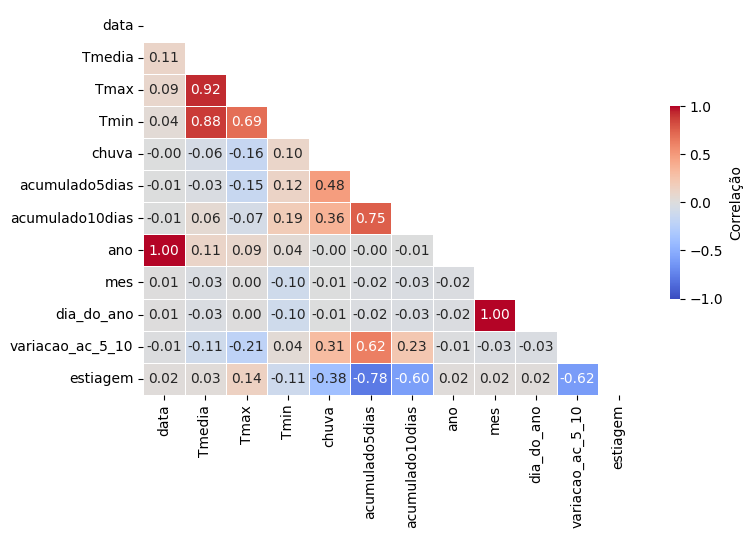

In [27]:
# Avaliação de correlação
correlation = df.corr(method='pearson')
mascara = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize = ((8, 5)))
plot = sns.heatmap(correlation,
                   mask=mascara,
                   annot = True,
                   fmt=".2f", vmax=1, center=0, vmin=-1,
                   cbar=True, cmap='coolwarm',
                   linewidths=.5,
                   cbar_kws={"shrink": .5, 'label': 'Correlação', 'orientation': 'vertical'})

plt.show()

A matriz de correlação indica que a variável estiagem está altamente correlacionada com acumulado5dias (-0.78) e acumulado10dias (-0.60), além de apresentar uma correlação moderada com chuva (-0.38). Isso significa que essas variáveis estão fornecendo informações que praticamente definem a estiagem de forma direta, o que pode levar o modelo a aprender padrões triviais em vez de generalizar corretamente.

In [28]:
# Verificação de desbalanceamento
estiagem_counts = df['estiagem'].value_counts()
estiagem_counts

,count
estiagem,
1,10850
0,5431


In [29]:
# Instalação de pacote
!pip install lazypredict
!pip install imblearn

In [30]:
# Importando bibliotecas
import pandas as pd
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separando as variáveis explicativas (X) e a variável target (y)
X = df.drop(columns=["data", "Tmax", "Tmin","acumulado5dias", "acumulado10dias", "estiagem"])
y = df["estiagem"]

# Dividindo os dados antes do balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE apenas no conjunto de treino
over_sampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

# Inicializando o classificador LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Treinando o modelo com os dados de treino balanceados
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)

# Imprimindo os resultados
models

100%|██████████| 32/32 [00:54<00:00,  1.69s/it]

[LightGBM] [Info] Number of positive: 7595, number of negative: 7595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 15190, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.88,0.89,0.89,0.89,1.86
XGBClassifier,0.87,0.87,0.87,0.87,0.18
RandomForestClassifier,0.87,0.87,0.87,0.87,1.85
BaggingClassifier,0.86,0.86,0.86,0.86,0.64
LGBMClassifier,0.86,0.86,0.86,0.86,0.20
ExtraTreeClassifier,0.84,0.84,0.84,0.84,0.04
SVC,0.80,0.83,0.83,0.80,4.71
NuSVC,0.80,0.83,0.83,0.80,10.16
DecisionTreeClassifier,0.84,0.83,0.83,0.84,0.15


Essas informações são logs gerados durante o treinamento de um modelo de aprendizado de máquina, no caso, um modelo LightGBM (Light Gradient Boosting Machine). Esses logs são informações de diagnóstico durante o treinamento do modelo, e não indicam necessariamente problemas, mas oferecem detalhes sobre o processo de construção do modelo e como os dados estão sendo manipulados.

* 100%|██████████| 32/32 [00:56<00:00, 1.76s/it]: Isso indica o progresso do treinamento, onde 32 iterações foram feitas, e o tempo total foi de 56 segundos, com uma média de 1.76 segundos por iteração.

* [LightGBM] [Info] Number of positive: 7595, number of negative: 7595: O modelo está sendo treinado com dados binários (duas classes). Aqui, é informado que o conjunto de dados contém 7595 exemplos da classe positiva e 7595 da classe negativa, totalizando 15.190 pontos de dados.

* [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001410 seconds: O LightGBM automaticamente escolheu a execução em múltiplos threads por coluna para acelerar o processo de treinamento. O overhead de teste, que é o tempo adicional necessário para essa escolha, foi de 0.001410 segundos.

* You can set force_col_wise=true to remove the overhead: Informa que, se você quiser, pode forçar a execução com múltiplos threads por coluna diretamente, sem a verificação automática, o que pode remover esse overhead.

* [LightGBM] [Info] Total Bins 1073: O modelo usou 1073 "bins" (divisões) para categorizar as variáveis contínuas. Isso é parte da técnica de "binning" do LightGBM, onde os valores contínuos são divididos em intervalos (bins) para otimizar a aprendizagem.

* [LightGBM] [Info] Number of data points in the train set: 15190, number of used features: 6: O conjunto de treinamento contém 15.190 pontos de dados e o modelo está usando 6 características (ou variáveis) para treinar.

* [LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000: O modelo é binário, e essa linha refere-se à pontuação inicial do modelo antes de qualquer iteração de boosting. O valor de pavg é a média das probabilidades da classe positiva no conjunto de treinamento (aqui é 0.5, ou seja, as classes estão equilibradas). O valor de initscore é 0, indicando que a previsão inicial do modelo antes de qualquer treinamento é neutra (sem viés para qualquer classe).

Esses logs são informações de diagnóstico durante o treinamento do modelo, e não indicam necessariamente problemas, mas oferecem detalhes sobre o processo de construção do modelo e como os dados estão sendo manipulados.









Os resultados representam a performance de diferentes modelos de classificação com base em várias métricas, e o tempo de execução de cada modelo. Vamos explicar cada uma das métricas apresentadas:

*  Accuracy (Acurácia): Mede a proporção de previsões corretas feitas pelo modelo. Um valor de 1 (ou 100%) indica que o modelo acertou todas as previsões, enquanto um valor de 0 indica que ele errou todas. O valor mostrado em cada linha é a acurácia do respectivo modelo.

*  Balanced Accuracy (Acurácia Balanceada): A acurácia balanceada é uma métrica que leva em consideração o desequilíbrio entre as classes. Ela é calculada como a média da acurácia das classes positivas e negativas. Isso é útil quando o conjunto de dados tem um número desigual de exemplos em cada classe, ajudando a evitar que o modelo favoreça a classe maior.

* ROC AUC (Área Sob a Curva ROC): A área sob a curva (AUC) da curva ROC é uma medida de desempenho que avalia a capacidade do modelo de distinguir entre as classes. A AUC varia de 0 a 1, onde 1 significa que o modelo é perfeito, e 0.5 significa que o modelo não é melhor que uma escolha aleatória. Quanto maior o valor da AUC, melhor o modelo é em discriminar entre as classes.

* F1 Score: O F1 Score é a média harmônica entre a precisão e a revocação. Ele é especialmente útil quando há um desequilíbrio nas classes, pois leva em consideração tanto os falsos positivos quanto os falsos negativos. Um valor de 1 é perfeito, indicando um equilíbrio entre precisão e recall, enquanto 0 significa um modelo ineficaz.

* Time Taken (Tempo de Execução): O tempo que o modelo levou para treinar ou fazer previsões, geralmente expresso em segundos.

Aqui está uma explicação para cada um dos modelos listados, com base nos resultados apresentados:

1. **ExtraTreesClassifier (Extra Trees Classifier)**:
   - Este modelo é uma versão do algoritmo Random Forest, mas com uma diferença importante: ele constrói árvores de decisão mais aleatórias ao fazer divisões nos dados. Em vez de usar o critério tradicional de divisão, o Extra Trees escolhe de forma mais aleatória, o que pode resultar em um modelo mais robusto e com menor risco de overfitting.
   - **Desempenho**: 88% de acurácia, 89% de AUC, 89% de F1 Score, mostrando um bom equilíbrio entre precisão e recall, com boa discriminação entre as classes.
   - **Tempo de Execução**: 2.08 segundos.

2. **XGBClassifier (Extreme Gradient Boosting Classifier)**:
   - O XGBClassifier é baseado no algoritmo de gradient boosting, que constrói um modelo forte combinando vários modelos fracos (normalmente árvores de decisão). É altamente eficiente e amplamente utilizado devido à sua alta performance em uma variedade de tarefas de classificação.
   - **Desempenho**: 87% de acurácia e AUC, um bom desempenho, mas ligeiramente abaixo do ExtraTreesClassifier.
   - **Tempo de Execução**: 0.18 segundos (bastante rápido).

3. **RandomForestClassifier**:
   - O Random Forest também utiliza um conjunto de árvores de decisão, mas a principal diferença em relação ao Extra Trees é que ele constrói árvores mais "determinísticas", ou seja, a escolha de divisões é menos aleatória. É um modelo robusto e bem conhecido por sua resistência ao overfitting.
   - **Desempenho**: 87% de acurácia, AUC e F1 Score, mostrando resultados consistentes, com desempenho semelhante ao XGBClassifier.
   - **Tempo de Execução**: 2.62 segundos.

4. **BaggingClassifier**:
   - O Bagging (Bootstrap Aggregating) é uma técnica de ensemble que combina a previsão de múltiplos modelos treinados em subconjuntos diferentes dos dados. Ele reduz a variabilidade e o overfitting.
   - **Desempenho**: 86% de acurácia, AUC e F1 Score, que é bom, mas inferior aos anteriores.
   - **Tempo de Execução**: 0.89 segundos.

5. **LGBMClassifier (LightGBM Classifier)**:
   - O LightGBM é uma implementação de gradient boosting, projetada para ser mais eficiente em termos de memória e velocidade. Ele é particularmente bom para grandes conjuntos de dados.
   - **Desempenho**: 86% de acurácia, AUC e F1 Score, semelhante ao BaggingClassifier, mas com um tempo de execução mais rápido.
   - **Tempo de Execução**: 0.21 segundos.

6. **ExtraTreeClassifier**:
   - Semelhante ao ExtraTreesClassifier, mas cada árvore é construída de forma mais agressiva, com mais aleatoriedade nas divisões. Isso pode resultar em um modelo mais instável, mas potencialmente mais rápido.
   - **Desempenho**: 84% de acurácia, AUC e F1 Score, um pouco inferior aos modelos anteriores.
   - **Tempo de Execução**: 0.04 segundos (muito rápido).

7. **SVC (Support Vector Classifier)**:
   - O SVC é um modelo baseado em Support Vector Machines, que tenta encontrar o melhor hiperplano que separa as classes. Ele é eficaz, especialmente em conjuntos de dados com margens claras de separação, mas pode ser lento com grandes conjuntos de dados.
   - **Desempenho**: 80% de acurácia, AUC de 83%, bom desempenho, mas leva mais tempo para treinar.
   - **Tempo de Execução**: 8.08 segundos.

8. **NuSVC (Nu Support Vector Classifier)**:
   - Uma variação do SVC que permite um controle maior sobre a margem de separação, ajustando o parâmetro Nu. Embora tenha desempenho semelhante ao SVC, pode ser mais sensível a determinados dados.
   - **Desempenho**: 80% de acurácia, AUC de 83%, desempenho similar ao SVC, mas com maior tempo de execução.
   - **Tempo de Execução**: 17.50 segundos (muito mais lento).

9. **DecisionTreeClassifier (Árvore de Decisão)**:
   - A Árvore de Decisão é um modelo simples, mas eficiente, que divide os dados de forma recursiva com base em um critério. Embora fácil de interpretar, pode sofrer de overfitting se não for podada adequadamente.
   - **Desempenho**: 84% de acurácia, AUC de 83%, com um bom desempenho geral.
   - **Tempo de Execução**: 0.14 segundos.

10. **KNeighborsClassifier**:
    - O K-Nearest Neighbors (KNN) classifica um ponto com base nos "K" vizinhos mais próximos. É simples, mas pode ser computacionalmente caro com grandes conjuntos de dados.
    - **Desempenho**: 82% de acurácia, AUC de 83%, bom desempenho, mas não o melhor.
    - **Tempo de Execução**: 0.58 segundos.

11. **LabelSpreading e LabelPropagation**:
    - São modelos baseados em grafos, usados para tarefas de classificação semi-supervisionada. Eles propagam rótulos através de um grafo de similaridade entre os dados.
    - **Desempenho**: 82% de acurácia, AUC de 82%, com bom desempenho em tarefas semi-supervisionadas.
    - **Tempo de Execução**: 14.89 e 18.63 segundos, respectivamente.

12. **AdaBoostClassifier**:
    - O AdaBoost combina classificadores fracos de forma sequencial, ajustando os pesos dos erros de cada modelo para melhorar a precisão.
    - **Desempenho**: 78% de acurácia, AUC de 82%, com um desempenho mais modesto.
    - **Tempo de Execução**: 1.03 segundos.

13. **SGDClassifier (Stochastic Gradient Descent Classifier)**:
    - Este modelo usa um método de otimização baseado em gradiente para aprender os parâmetros do modelo. Ele é eficiente para grandes conjuntos de dados, mas pode ser sensível a hiperparâmetros.
    - **Desempenho**: 79% de acurácia, AUC de 82%, com desempenho razoável.
    - **Tempo de Execução**: 0.14 segundos.

14. **PassiveAggressiveClassifier**:
    - O Passive-Aggressive é um modelo de aprendizado online, que ajusta rapidamente suas previsões quando encontra novos dados, sendo eficaz para dados de fluxo contínuo.
    - **Desempenho**: 77% de acurácia, AUC de 81%, com bom desempenho, mas inferior aos modelos anteriores.
    - **Tempo de Execução**: 0.04 segundos (muito rápido).

15. **Modelos lineares e outros (como LogisticRegression, LinearSVC, etc.)**:
    - Estes modelos são mais simples, mas podem ser eficientes para problemas lineares. A regressão logística é comumente usada para classificação binária, e o LinearSVC é uma variante linear do SVC.
    - **Desempenho**: 79% a 80% de acurácia e AUC, bom desempenho, mas mais lentos ou menos eficazes para problemas não-lineares.
    - **Tempo de Execução**: Variável, com tempos muito rápidos para a maioria desses modelos (menos de 0.3 segundos).

16. **DummyClassifier**:
    - Este modelo é um "modelo básico" que faz previsões aleatórias, ou baseadas em uma estratégia simples como prever a classe majoritária. Serve como um ponto de referência para comparar a performance dos outros modelos.
    - **Desempenho**: 33% de acurácia, que é o valor esperado para previsões aleatórias em um problema balanceado.
    - **Tempo de Execução**: 0.04 segundos.

Cada um desses modelos tem características próprias em termos de performance e tempo de execução, e a escolha do modelo ideal depende do problema específico, do tamanho e da complexidade dos dados.

## **Separando dados de Treino/Teste e Validação**

In [31]:
#Conjunto de Dados Oficial
df

,data,Tmedia,Tmax,Tmin,chuva,acumulado5dias,acumulado10dias,ano,mes,dia_do_ano,variacao_ac_5_10,estiagem
0,1979-06-01,7.60,17.50,2.20,0.00,0.00,0.00,1979,6,152,0.00,1
1,1979-06-02,13.50,21.50,6.60,0.00,0.00,0.00,1979,6,153,0.00,1
2,1979-06-03,18.70,28.30,11.10,0.00,0.00,0.00,1979,6,154,0.00,1
3,1979-06-04,21.30,30.30,13.30,0.00,0.00,0.00,1979,6,155,0.00,1
4,1979-06-05,21.40,29.60,15.20,0.00,0.00,0.00,1979,6,156,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16280,2023-12-27,26.00,32.80,18.90,0.00,4.60,4.60,2023,12,361,0.82,1
16281,2023-12-28,28.70,36.20,20.40,0.00,2.10,4.60,2023,12,362,0.38,1
16282,2023-12-29,28.70,37.80,22.00,0.00,2.00,4.60,2023,12,363,0.36,1
16283,2023-12-30,25.80,32.70,21.60,0.00,0.00,4.60,2023,12,364,0.00,1


In [32]:
# Definindo as datas divididas - Para os testes
date_split_train_test = pd.to_datetime('2021-08-31')
date_split_valid = pd.to_datetime('2021-09-01')

# Criando o df1_train_test
df1_train_test = df[df['data'] <= date_split_train_test]

# Criando o df2_valid
df2_valid = df[(df['data'] >= date_split_valid) & (df['data'] <= pd.to_datetime('2023-12-31'))]

print("df1_train_test shape:", df1_train_test.shape)
print("df2_valid shape:", df2_valid.shape)

df1_train_test shape: (15429, 12)
df2_valid shape: (852, 12)


In [33]:
# Criando df2_ruim (2021-09-01 a 2022-03-31)
df2_ruim = df2_valid[(df2_valid['data'] >= '2021-09-01') & (df2_valid['data'] <= '2022-03-31')]

# Criando df2_boa (2022-09-01 a 2023-03-31)
df2_boa = df2_valid[(df2_valid['data'] >= '2022-09-01') & (df2_valid['data'] <= '2023-03-31')]

print("df2_ruim shape:", df2_ruim.shape)
print("df2_boa shape:", df2_boa.shape)

df2_ruim shape: (212, 12)
df2_boa shape: (212, 12)


## **Classificação: Machine Learning**

**Bases separadas:**

* df - original para construir o conjunto de dados
* df1_train_test - treinamento e testes do ML (1979-06-01 a 2021-08-31) - 15429 informações
* df2_valid - validações do ML (01-09-2021 a 31-12-2023)
    * df2_ruim (2021-09-01 a 2022-03-31)
    * df2_boa (2022-09-01 a 2023-03-31)


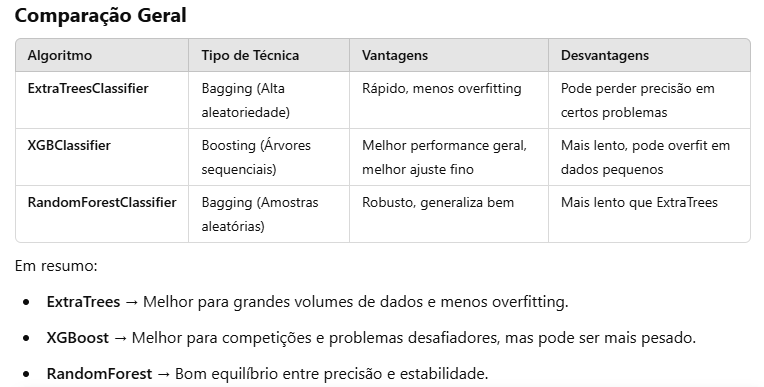

In [34]:
# Bibliotecas importantes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# Base de Dados de Treinamento e Teste
df1_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15429 entries, 0 to 15432
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              15429 non-null  datetime64[ns]
 1   Tmedia            15429 non-null  float64       
 2   Tmax              15429 non-null  float64       
 3   Tmin              15429 non-null  float64       
 4   chuva             15429 non-null  float64       
 5   acumulado5dias    15429 non-null  float64       
 6   acumulado10dias   15429 non-null  float64       
 7   ano               15429 non-null  int32         
 8   mes               15429 non-null  int32         
 9   dia_do_ano        15429 non-null  int32         
 10  variacao_ac_5_10  15429 non-null  float64       
 11  estiagem          15429 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int32(3), int64(1)
memory usage: 1.4 MB


In [36]:
# Separando as variáveis explicativas (X) e a variável target (y)
# Tmedia, chuva, ano, mes, dia_do_ano, variacao_ac_5_10
# estiagem (0,1)

X = df1_train_test.drop(columns=["data", "Tmax", "Tmin","acumulado5dias", "acumulado10dias", "estiagem"])
y = df1_train_test["estiagem"]

In [37]:
# Dividindo os dados antes do balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE apenas no conjunto de treino
over_sampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

In [38]:
# Função Classificação
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Resultado do treinamento:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Relatório de classificação:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Resultado do teste:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Relatório de classificação:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

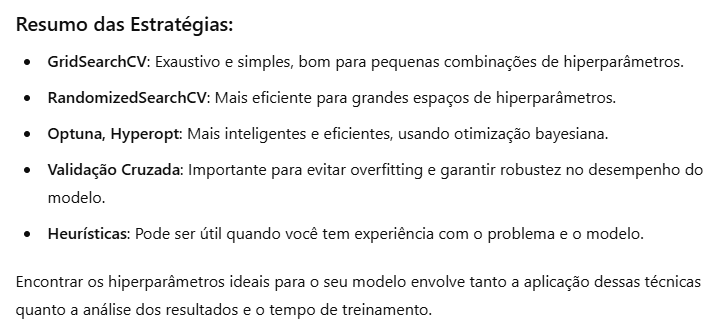

**Ajustar Hiperparâmetros do ExtraTreesClassifier e RandonForestClassifier para Melhorar a Generalização**

Vários hiperparâmetros podem ser ajustados para evitar superajuste e melhorar a performance no teste:

* n_estimators: Número de árvores na floresta. Um valor muito alto pode aumentar o overfitting, um valor muito baixo pode levar a underfitting. Normalmente, testar entre 50 e 300 funciona bem.
* max_depth: Profundidade máxima das árvores. Se None, as árvores crescem completamente, aumentando o overfitting. Limitar para 10 a 20 níveis pode ajudar.
* min_samples_split e min_samples_leaf: Controlam o número mínimo de amostras necessárias para dividir um nó e o número mínimo de amostras em uma folha. Valores maiores (exemplo, min_samples_split=5, min_samples_leaf=2) reduzem o overfitting.
* max_features: Determina quantas variáveis são consideradas para cada divisão de nó. Pode ser "sqrt" ou "log2" para reduzir a complexidade do modelo.

In [39]:
# Importando a biblioteca necessária
from sklearn.ensemble import RandomForestClassifier

# Inicializando o classificador RandomForestClassifier com hiperparâmetros ajustados
rf_clf = RandomForestClassifier(random_state=42,               # Para reprodutibilidade
                                n_estimators=200,              # Número de árvores na floresta
                                max_depth=15,                  # Profundidade máxima das árvores (None permite crescimento ilimitado)
                                min_samples_split=5,           # Número mínimo de amostras para dividir um nó
                                min_samples_leaf=1,            # Número mínimo de amostras em um nó folha
                                )
# Treinando o modelo com os dados de treino balanceados
rf_clf.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões
y_pred_rf = rf_clf.predict(X_test)

#Relatório de Resultados
print_score(rf_clf, X_train_resampled, y_train_resampled, X_test, y_test, train=True)
print_score(rf_clf, X_train_resampled, y_train_resampled, X_test, y_test, train=False)

Resultado do treinamento:
Accuracy Score: 96.24%
_______________________________________________
Relatório de classificação:
                0       1  accuracy  macro avg  weighted avg
precision    0.94    0.99      0.96       0.96          0.96
recall       0.99    0.93      0.96       0.96          0.96
f1-score     0.96    0.96      0.96       0.96          0.96
support   7198.00 7198.00      0.96   14396.00      14396.00
_______________________________________________
Confusion Matrix: 
 [[7145   53]
 [ 488 6710]]

Resultado do teste:
Accuracy Score: 85.79%
_______________________________________________
Relatório de classificação:
                0       1  accuracy  macro avg  weighted avg
precision    0.74    0.94      0.86       0.84          0.87
recall       0.89    0.84      0.86       0.87          0.86
f1-score     0.81    0.89      0.86       0.85          0.86
support   1544.00 3085.00      0.86    4629.00       4629.00
_______________________________________________
Co

In [40]:
# Importando a biblioteca necessária
from sklearn.ensemble import ExtraTreesClassifier

# Inicializando o ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=200,
                              max_depth=15,
                              min_samples_split=5,
                              min_samples_leaf=2,
                              random_state=42)

# Treinando o modelo com os dados balanceados
et_clf.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões
y_pred_et = et_clf.predict(X_test)

#Relatório de Resultados
print_score(et_clf, X_train_resampled, y_train_resampled, X_test, y_test, train=True)
print_score(et_clf, X_train_resampled, y_train_resampled, X_test, y_test, train=False)

Resultado do treinamento:
Accuracy Score: 91.84%
_______________________________________________
Relatório de classificação:
                0       1  accuracy  macro avg  weighted avg
precision    0.87    0.98      0.92       0.93          0.93
recall       0.98    0.85      0.92       0.92          0.92
f1-score     0.92    0.91      0.92       0.92          0.92
support   7198.00 7198.00      0.92   14396.00      14396.00
_______________________________________________
Confusion Matrix: 
 [[7074  124]
 [1051 6147]]

Resultado do teste:
Accuracy Score: 83.75%
_______________________________________________
Relatório de classificação:
                0       1  accuracy  macro avg  weighted avg
precision    0.69    0.96      0.84       0.82          0.87
recall       0.93    0.79      0.84       0.86          0.84
f1-score     0.79    0.87      0.84       0.83          0.84
support   1544.00 3085.00      0.84    4629.00       4629.00
_______________________________________________
Co

In [41]:
# Importando a biblioteca necessária
import xgboost as xgb

# Inicializando o classificador XGBClassifier
xgb_clf = xgb.XGBClassifier(random_state=42,
                            use_label_encoder=False,
                            eval_metric='logloss',
                            )

# Treinando o modelo com os dados de treino balanceados
xgb_clf.fit(X_train_resampled, y_train_resampled)


# Fazendo previsões
y_pred_xgb = xgb_clf.predict(X_test)

#Relatório de Resultados
print_score(xgb_clf, X_train_resampled, y_train_resampled, X_test, y_test, train=True)
print_score(xgb_clf, X_train_resampled, y_train_resampled, X_test, y_test, train=False)

Resultado do treinamento:
Accuracy Score: 96.90%
_______________________________________________
Relatório de classificação:
                0       1  accuracy  macro avg  weighted avg
precision    0.95    0.98      0.97       0.97          0.97
recall       0.98    0.95      0.97       0.97          0.97
f1-score     0.97    0.97      0.97       0.97          0.97
support   7198.00 7198.00      0.97   14396.00      14396.00
_______________________________________________
Confusion Matrix: 
 [[7090  108]
 [ 338 6860]]

Resultado do teste:
Accuracy Score: 87.36%
_______________________________________________
Relatório de classificação:
                0       1  accuracy  macro avg  weighted avg
precision    0.77    0.94      0.87       0.85          0.88
recall       0.88    0.87      0.87       0.88          0.87
f1-score     0.82    0.90      0.87       0.86          0.88
support   1544.00 3085.00      0.87    4629.00       4629.00
_______________________________________________
Co

## **Validação**

### **Teste Safra Ruim de 2021-2022**

In [42]:
# Original para validação
df2_ruim

,data,Tmedia,Tmax,Tmin,chuva,acumulado5dias,acumulado10dias,ano,mes,dia_do_ano,variacao_ac_5_10,estiagem
15433,2021-09-01,24.40,32.40,17.10,0.00,3.30,45.90,2021,9,244,0.07,1
15434,2021-09-02,26.10,34.60,18.70,0.00,1.10,45.90,2021,9,245,0.02,1
15435,2021-09-03,26.50,36.50,16.30,0.00,0.00,45.90,2021,9,246,0.00,1
15436,2021-09-04,28.10,37.30,17.90,0.00,0.00,45.90,2021,9,247,0.00,1
15437,2021-09-05,24.40,30.30,20.70,3.10,3.10,46.50,2021,9,248,0.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15640,2022-03-27,22.80,28.90,17.00,0.00,59.70,81.20,2022,3,86,0.73,0
15641,2022-03-28,25.30,31.90,19.10,0.00,59.50,73.40,2022,3,87,0.80,0
15642,2022-03-29,27.50,33.40,22.20,2.50,51.90,75.60,2022,3,88,0.68,0
15643,2022-03-30,25.80,33.50,21.40,0.10,2.60,75.60,2022,3,89,0.03,1


In [43]:
# Separando as informações da base de treino e teste sem o rótulo
X_unlabeled_ruim = df2_ruim.drop(columns=["data", "Tmax", "Tmin","acumulado5dias", "acumulado10dias", "estiagem"])

In [44]:
# A tabela para validação tem de ser a mesma do treinamento e teste
X_unlabeled_ruim

,Tmedia,chuva,ano,mes,dia_do_ano,variacao_ac_5_10
15433,24.40,0.00,2021,9,244,0.07
15434,26.10,0.00,2021,9,245,0.02
15435,26.50,0.00,2021,9,246,0.00
15436,28.10,0.00,2021,9,247,0.00
15437,24.40,3.10,2021,9,248,0.07
...,...,...,...,...,...,...
15640,22.80,0.00,2022,3,86,0.73
15641,25.30,0.00,2022,3,87,0.80
15642,27.50,2.50,2022,3,88,0.68
15643,25.80,0.10,2022,3,89,0.03


In [45]:
# Teste de Validação: RandomForestClassifier

# Prevendo rótulos para o conjunto de dados não rotulado
y_pred_unlabeled = rf_clf.predict(X_unlabeled_ruim)

# Contando a quantidade de rótulos 0 e 1
counts = np.bincount(y_pred_unlabeled)

# Calculando a porcentagem
total = len(y_pred_unlabeled)
percent_1 = (counts[1] / total) * 100
percent_0 = (counts[0] / total) * 100

# Exibindo a quantidade e a porcentagem de 0s e 1s
print(f"Quantidade de 1 - com estiagem: {counts[1]} ({percent_1:0.0f}%)")
print(f"Quantidade de 0 - sem estiagem: {counts[0]} ({percent_0:0.0f}%)")


Quantidade de 1 - com estiagem: 141 (67%)
Quantidade de 0 - sem estiagem: 71 (33%)


In [46]:
# Teste de Validação: ExtraTreesClassifier

# Prevendo rótulos para o conjunto de dados não rotulado
y_pred_unlabeled = et_clf.predict(X_unlabeled_ruim)

# Contando a quantidade de rótulos 0 e 1
counts = np.bincount(y_pred_unlabeled)

# Calculando a porcentagem
total = len(y_pred_unlabeled)
percent_1 = (counts[1] / total) * 100
percent_0 = (counts[0] / total) * 100

# Exibindo a quantidade e a porcentagem de 0s e 1s
print(f"Quantidade de 1 - com estiagem: {counts[1]} ({percent_1:0.0f}%)")
print(f"Quantidade de 0 - sem estiagem: {counts[0]} ({percent_0:0.0f}%)")

Quantidade de 1 - com estiagem: 121 (57%)
Quantidade de 0 - sem estiagem: 91 (43%)


In [47]:
# Teste de Validação: XGBClassifier

# Prevendo rótulos para o conjunto de dados não rotulado
y_pred_unlabeled = xgb_clf.predict(X_unlabeled_ruim)

# Contando a quantidade de rótulos 0 e 1
counts = np.bincount(y_pred_unlabeled)

# Calculando a porcentagem
total = len(y_pred_unlabeled)
percent_1 = (counts[1] / total) * 100
percent_0 = (counts[0] / total) * 100

# Exibindo a quantidade e a porcentagem de 0s e 1s
print(f"Quantidade de 1 - com estiagem: {counts[1]} ({percent_1:0.0f}%)")
print(f"Quantidade de 0 - sem estiagem: {counts[0]} ({percent_0:0.0f}%)")

Quantidade de 1 - com estiagem: 153 (72%)
Quantidade de 0 - sem estiagem: 59 (28%)


### **Teste Safra Boa de 2022-2023**

In [48]:
# Original para validação
df2_boa

,data,Tmedia,Tmax,Tmin,chuva,acumulado5dias,acumulado10dias,ano,mes,dia_do_ano,variacao_ac_5_10,estiagem
15798,2022-09-01,25.30,33.00,18.20,0.00,0.00,0.00,2022,9,244,0.00,1
15799,2022-09-02,25.00,33.10,18.80,0.00,0.00,0.00,2022,9,245,0.00,1
15800,2022-09-03,18.60,24.00,15.20,0.00,0.00,0.00,2022,9,246,0.00,1
15801,2022-09-04,17.00,23.70,12.80,4.50,4.50,4.50,2022,9,247,0.82,1
15802,2022-09-05,17.50,23.20,13.90,0.00,4.50,4.50,2022,9,248,0.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16005,2023-03-27,26.20,33.50,19.90,0.00,3.70,12.00,2023,3,86,0.28,1
16006,2023-03-28,27.20,34.80,21.30,0.00,3.70,3.70,2023,3,87,0.79,1
16007,2023-03-29,28.10,35.70,21.70,0.00,3.70,3.70,2023,3,88,0.79,1
16008,2023-03-30,24.70,33.60,18.50,34.70,38.40,38.40,2023,3,89,0.97,0


In [49]:
# Separando as informações da base de treino e teste sem o rótulo
X_unlabeled_boa = df2_boa.drop(columns=["data", "Tmax", "Tmin","acumulado5dias", "acumulado10dias", "estiagem"])

In [50]:
# Teste de Validação: RandomForestClassifier

# Prevendo rótulos para o conjunto de dados não rotulado
y_pred_unlabeled = rf_clf.predict(X_unlabeled_boa)

# Contando a quantidade de rótulos 0 e 1
counts = np.bincount(y_pred_unlabeled)

# Calculando a porcentagem
total = len(y_pred_unlabeled)
percent_1 = (counts[1] / total) * 100
percent_0 = (counts[0] / total) * 100

# Exibindo a quantidade e a porcentagem de 0s e 1s
print(f"Quantidade de 1 - com estiagem: {counts[1]} ({percent_1:0.0f}%)")
print(f"Quantidade de 0 - sem estiagem: {counts[0]} ({percent_0:0.0f}%)")

Quantidade de 1 - com estiagem: 118 (56%)
Quantidade de 0 - sem estiagem: 94 (44%)


In [51]:
# Teste de Validação: ExtraTreesClassifier

# Prevendo rótulos para o conjunto de dados não rotulado
y_pred_unlabeled = et_clf.predict(X_unlabeled_boa)

# Contando a quantidade de rótulos 0 e 1
counts = np.bincount(y_pred_unlabeled)

# Calculando a porcentagem
total = len(y_pred_unlabeled)
percent_1 = (counts[1] / total) * 100
percent_0 = (counts[0] / total) * 100

# Exibindo a quantidade e a porcentagem de 0s e 1s
print(f"Quantidade de 1 - com estiagem: {counts[1]} ({percent_1:0.0f}%)")
print(f"Quantidade de 0 - sem estiagem: {counts[0]} ({percent_0:0.0f}%)")

Quantidade de 1 - com estiagem: 100 (47%)
Quantidade de 0 - sem estiagem: 112 (53%)


In [52]:
# Teste de Validação: XGBClassifier

# Prevendo rótulos para o conjunto de dados não rotulado
y_pred_unlabeled = xgb_clf.predict(X_unlabeled_boa)

# Contando a quantidade de rótulos 0 e 1
counts = np.bincount(y_pred_unlabeled)

# Calculando a porcentagem
total = len(y_pred_unlabeled)
percent_1 = (counts[1] / total) * 100
percent_0 = (counts[0] / total) * 100

# Exibindo a quantidade e a porcentagem de 0s e 1s
print(f"Quantidade de 1 - com estiagem: {counts[1]} ({percent_1:0.0f}%)")
print(f"Quantidade de 0 - sem estiagem: {counts[0]} ({percent_0:0.0f}%)")

Quantidade de 1 - com estiagem: 133 (63%)
Quantidade de 0 - sem estiagem: 79 (37%)


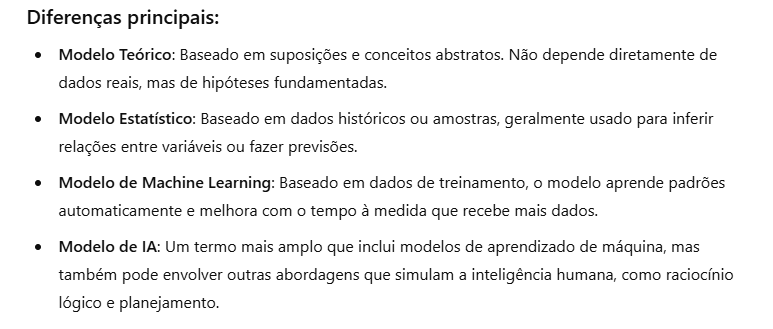